In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
movie_details = []
movie_reviews = []

def load_dataset(filepath: str):
    dataset = []
    with open(filepath, "r") as f:
        for i, line in enumerate(f):
            line = line.strip()
            if line:
                data = json.loads(line)
                dataset.append(data)
    return dataset

def duration_to_minutes(duration):
    hour_match = re.search(r'(\d+)\s*h', duration)
    min_match = re.search(r'(\d+)\s*min', duration)

    hours = 0
    minutes = 0

    if hour_match:
        hours = int(hour_match.group(1))
    if min_match:
        minutes = int(min_match.group(1))
        
    return (hours * 60) + minutes

In [5]:
from ast import literal_eval
import ast
movie_details = pd.DataFrame(load_dataset("IMDB_movie_details.json"))

movie_details['duration'] = movie_details['duration'].apply(duration_to_minutes)
movie_details['release_date'] = pd.to_datetime(movie_details['release_date'], errors='coerce')
movie_details['rating'] = pd.to_numeric(movie_details['rating'], errors='coerce')
movie_details['plot_synopsis'].replace("", np.nan, inplace=True)

movie_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",117,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",105,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",97,"[Comedy, Romance]",6.7,2002-04-11,NaN
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",126,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,103,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [6]:
movie_reviews = pd.DataFrame(load_dataset("IMDB_reviews.json"))

movie_reviews['review_date'] = pd.to_datetime(movie_reviews['review_date'], errors='coerce')
movie_reviews['is_spoiler'] = movie_reviews['is_spoiler'].astype(bool)
movie_reviews['rating'] = pd.to_numeric(movie_reviews['rating'], errors='coerce')
movie_reviews['review_id'] = np.arange(len(movie_reviews))

movie_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,review_id
0,2006-02-10,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,0
1,2000-09-06,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,1
2,2001-08-03,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,2
3,2002-09-01,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,3
4,2004-05-20,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",4


In [7]:
train_data, test_data = train_test_split(
    movie_reviews,
    test_size=0.2,
    stratify=movie_reviews['is_spoiler'], 
    random_state=42
)

train_data.shape

(459130, 8)

In [8]:
train_data_oversample = train_data.copy()

train_data_oversample.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,review_id
94625,2012-10-25,tt0033870,ur5291991,True,The Maltese Falcon film noir based on the nove...,10,A Classic Detective Thriller,94625
89585,2015-05-29,tt1392190,ur48053412,True,Water is a scarce resource so when it is dispe...,1,No plot spoilers,89585
187840,2014-02-26,tt1800241,ur28438054,True,I was really expecting a lot given all the hyp...,5,Most overrated film of 2013,187840
265694,2017-09-11,tt1396484,ur35553121,False,"This movie was just awful. It was not scary, t...",1,Waste of oxygen,265694
125407,2011-01-06,tt0840361,ur14069613,False,"""The Town"" is an excellent film that does have...",7,Entertaining Heist Film,125407


In [9]:
test_data.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,review_id
322757,2003-03-18,tt0286106,ur1511522,True,After seeing Sixth sense and Unbreakable i had...,3,One word: Disappointment....,322757
280946,2001-04-04,tt0249462,ur1064962,False,I rented this movie from my local video shop y...,9,Brilly Elliot,280946
269020,2017-07-27,tt2239822,ur69861111,False,I was lucky enough to win tickets to an advanc...,8,Visually amazing,269020
342401,2003-11-22,tt0242653,ur2859559,False,"Despite some awful critics, I have to say that...",10,Makes you think...,342401
420689,2007-05-26,tt0443706,ur15482541,False,"Found it a fascinating film as it went along, ...",8,Thumbs Up but a Query,420689


In [10]:
train_data_oversample['review_length'] = train_data_oversample['review_text'].apply(lambda x: len(x))

train_data_oversample.sort_values('review_length',ascending=False).head(50)

bin_review_lengths = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000]
binned_review_lengths = pd.cut(
    train_data_oversample['review_length'],
    bins=bin_review_lengths,
    labels=[f"{bin_review_lengths[i]}-{bin_review_lengths[i+1]-1}" for i in range(len(bin_review_lengths)-1)],
    include_lowest=True,
    right=True
)
train_data_oversample["bin_review_length"] = binned_review_lengths

train_data_oversample.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,review_id,review_length,bin_review_length
94625,2012-10-25,tt0033870,ur5291991,True,The Maltese Falcon film noir based on the nove...,10,A Classic Detective Thriller,94625,2609,2000-2999
89585,2015-05-29,tt1392190,ur48053412,True,Water is a scarce resource so when it is dispe...,1,No plot spoilers,89585,1417,1000-1999
187840,2014-02-26,tt1800241,ur28438054,True,I was really expecting a lot given all the hyp...,5,Most overrated film of 2013,187840,1314,1000-1999
265694,2017-09-11,tt1396484,ur35553121,False,"This movie was just awful. It was not scary, t...",1,Waste of oxygen,265694,364,0-999
125407,2011-01-06,tt0840361,ur14069613,False,"""The Town"" is an excellent film that does have...",7,Entertaining Heist Film,125407,2256,2000-2999


In [11]:
import pandas as pd
from sklearn.utils import resample

def oversample_reviews(df):
    resampled_data = []
    
    for bin_label in df['bin_review_length'].unique():
        bin_data = df[df['bin_review_length'] == bin_label]
        
        # Separate the data into spoiler and non-spoiler classes
        spoiler_data = bin_data[bin_data['is_spoiler'] == 1]
        non_spoiler_data = bin_data[bin_data['is_spoiler'] == 0]
        
        # Perform oversampling based on class imbalance in each bin
        if len(spoiler_data) < len(non_spoiler_data):
            # Oversample the spoiler class
            oversample_spoiler = resample(spoiler_data, 
                                          replace=True,
                                          n_samples=len(non_spoiler_data) - len(spoiler_data),
                                          random_state=42)
            bin_data = pd.concat([bin_data, oversample_spoiler])
        elif len(non_spoiler_data) < len(spoiler_data):
            # Oversample the non-spoiler class
            oversample_non_spoiler = resample(non_spoiler_data, 
                                              replace=True, 
                                              n_samples=len(spoiler_data) - len(non_spoiler_data),
                                              random_state=42)
            bin_data = pd.concat([bin_data, oversample_non_spoiler])
        # If both classes are already balanced, do nothing (skip resampling)

        resampled_data.append(bin_data)
    
    df_resampled = pd.concat(resampled_data)
    df_resampled = df_resampled.reset_index(drop=True)
    df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return df_resampled

# Apply the oversampling function to the DataFrame
df_oversampled_by_class = oversample_reviews(train_data_oversample)

# Oversample by class check
df_oversampled_by_class_info = df_oversampled_by_class.groupby('bin_review_length')['is_spoiler'].value_counts().unstack(fill_value=0)
column_name = ['non_spoiler_rate', 'spoiler_rate']
df_oversampled_by_class_info.columns = column_name
df_oversampled_by_class_info['n_reviews'] = df_oversampled_by_class_info['non_spoiler_rate'] + df_oversampled_by_class_info['spoiler_rate']
df_oversampled_by_class_info["non_spoiler_rate"] = df_oversampled_by_class_info['non_spoiler_rate'] / df_oversampled_by_class_info['n_reviews']
df_oversampled_by_class_info["spoiler_rate"] = df_oversampled_by_class_info['spoiler_rate'] / df_oversampled_by_class_info['n_reviews']

df_oversampled_by_class_info


,non_spoiler_rate,spoiler_rate,n_reviews
bin_review_length,,,
0-999,0.5,0.5,361328
1000-1999,0.5,0.5,199796
2000-2999,0.5,0.5,63798
3000-3999,0.5,0.5,28324
4000-4999,0.5,0.5,13742
5000-5999,0.5,0.5,9236
6000-6999,0.5,0.5,664
7000-7999,0.5,0.5,66
8000-8999,0.5,0.5,38


In [12]:
df_oversampled_by_class.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,review_id,review_length,bin_review_length
0,2012-11-24,tt1242460,ur38011481,False,Could you stand to have the entire course of y...,8,Haunting,149945,2250,2000-2999
1,2016-09-01,tt1631867,ur31228772,True,One thing first: how did Rita know that if you...,7,Interesting,207746,1662,1000-1999
2,2010-07-10,tt0938283,ur22604376,False,I don't understand why all the bad reviews. I'...,9,Loved it,128353,643,0-999
3,2005-12-20,tt0330373,ur8478078,True,The latest installment in the Harry Potter ser...,7,"Disappointed in ""Goblet of Fire""",370226,1133,1000-1999
4,2010-05-24,tt1228705,ur20621772,False,it's an amazing movie it's script is well writ...,6,Pretty Good Sequel,127369,1178,1000-1999


# BERT + LOGREG

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

In [14]:
# ============================================================================
# STEP 1: Prepare the data
# ============================================================================
print("Step 1: Preparing data...")

# Prepare training data
X_train = df_oversampled_by_class['review_text'].copy()
y_train = df_oversampled_by_class['is_spoiler'].astype(int)

# Prepare test data
X_test = test_data['review_text'].copy()
y_test = test_data['is_spoiler'].astype(int)

# Check class distribution
print("\nTRAIN SET:")
print(f"Total samples: {len(X_train)}")
print(f"Class distribution:\n{y_train.value_counts()}")
print(f"Spoiler ratio: {y_train.mean():.2%}")

print("\nTEST SET:")
print(f"Total samples: {len(X_test)}")
print(f"Class distribution:\n{y_test.value_counts()}")
print(f"Spoiler ratio: {y_test.mean():.2%}")

Step 1: Preparing data...

TRAIN SET:
Total samples: 677044
Class distribution:
is_spoiler
0    338522
1    338522
Name: count, dtype: int64
Spoiler ratio: 50.00%

TEST SET:
Total samples: 114783
Class distribution:
is_spoiler
0    84598
1    30185
Name: count, dtype: int64
Spoiler ratio: 26.30%


Too many test data (would take DAYS in BERT process only :/)

In [15]:
# ============================================================================
# SMART SAMPLING: Balance speed vs performance
# ============================================================================

# Determine how much data to use
SAMPLE_SIZE = 5000
# 5000 samples ≈ 10-15 minutes
# 10000 samples ≈ 20-30 minutes  
# Full 42316 samples ≈ 2-3 hours (with optimizations)

if len(X_train) > SAMPLE_SIZE:
    print(f"\n⚡ Using {SAMPLE_SIZE} samples instead of {len(X_train)} for faster processing")
    
    from sklearn.model_selection import train_test_split
    X_train, _, y_train, _ = train_test_split(
        X_train, y_train,
        train_size=SAMPLE_SIZE,
        random_state=42,
        stratify=y_train  # Maintains class balance
    )
    print(f"New training size: {len(X_train)}")
    print(f"Class distribution maintained: {y_train.value_counts().to_dict()}")


⚡ Using 5000 samples instead of 677044 for faster processing
New training size: 5000
Class distribution maintained: {0: 2500, 1: 2500}


In [20]:
TEST_SAMPLE_SIZE = 1000

# Sample test data
if len(X_test) > TEST_SAMPLE_SIZE:
    X_test, _, y_test, _ = train_test_split(
        X_test, y_test,
        train_size=TEST_SAMPLE_SIZE,
        random_state=42,
        stratify=y_test
    )
    print(f"✓ Test: Using {len(X_test)} samples (sampled from original)")
else:
    print(f"✓ Test: Using all {len(X_test)} samples")

print(f"\nEstimated total time: ~15-20 minutes")
print(f"Test class distribution: {y_test.value_counts().to_dict()}")

✓ Test: Using 1000 samples (sampled from original)

Estimated total time: ~15-20 minutes
Test class distribution: {0: 737, 1: 263}


In [16]:
# ============================================================================
# STEP 2: Load BERT model and tokenizer
# ============================================================================
print("\nStep 2: Loading BERT model...")

# Using base BERT model (you can also try 'bert-large-uncased' for better performance)
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_model = bert_model.to(device)
bert_model.eval()  # Set to evaluation mode

print(f"Using device: {device}")


Step 2: Loading BERT model...
Using device: cpu


In [ ]:
# ============================================================================
# STEP 3: Extract BERT embeddings
# ============================================================================
print("\nStep 3: Extracting BERT embeddings...")

def get_bert_embeddings(texts, batch_size=32, max_length=256):
    """
    Extract BERT embeddings for a list of texts.
    Uses [CLS] token embedding as sentence representation.
    
    OPTIMIZATIONS:
    - Larger batch_size (32 instead of 16) = 2x faster
    - Shorter max_length (256 instead of 512) = 2x faster
    - Total speedup: ~4x faster!
    """
    embeddings = []
    
    # Convert to list if needed
    if not isinstance(texts, list):
        texts = texts.tolist()
    
    # Process in batches to avoid memory issues
    for i in tqdm(range(0, len(texts), batch_size), desc="Extracting embeddings"):
        batch_texts = texts[i:i + batch_size]
        
        # Tokenize
        encoded = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )
        
        # Move to device
        input_ids = encoded['input_ids'].to(device)
        attention_mask = encoded['attention_mask'].to(device)
        
        # Get BERT outputs
        with torch.no_grad():
            outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)
            
            # Use [CLS] token embedding (first token of last hidden state)
            cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            embeddings.append(cls_embeddings)
    
    return np.vstack(embeddings)

# Extract embeddings for training and test sets
print("\nExtracting training embeddings...")
X_train_embeddings = get_bert_embeddings(X_train.tolist())

print(f"\nEmbedding shape: {X_train_embeddings.shape}")
print(f"Each review is represented by a {X_train_embeddings.shape[1]}-dimensional vector")



Step 3: Extracting BERT embeddings...

Extracting training embeddings...


Extracting embeddings: 100%|██████████| 157/157 [33:22<00:00, 12.75s/it]



Extracting test embeddings...


Extracting embeddings:   1%|          | 44/3587 [08:16<11:05:56, 11.28s/it]


KeyboardInterrupt: 

In [19]:
print(f"\nEmbedding shape: {X_train_embeddings.shape}")
print(f"Each review is represented by a {X_train_embeddings.shape[1]}-dimensional vector")


Embedding shape: (5000, 768)
Each review is represented by a 768-dimensional vector


In [21]:
print("\nExtracting test embeddings...")
X_test_embeddings = get_bert_embeddings(X_test.tolist())


Extracting test embeddings...


Extracting embeddings: 100%|██████████| 32/32 [06:31<00:00, 12.24s/it]


In [22]:
print(f"\nTest embedding shape: {X_test_embeddings.shape}")
print(f"Each review is represented by a {X_test_embeddings.shape[1]}-dimensional vector")


Test embedding shape: (1000, 768)
Each review is represented by a 768-dimensional vector


In [23]:
# ============================================================================
# STEP 4: Train Logistic Regression
# ============================================================================
print("\nStep 4: Training Logistic Regression...")

# Initialize logistic regression with balanced class weights
# This helps handle any remaining class imbalance
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced',  # Adjusts weights inversely proportional to class frequencies
    C=1.0,  # Regularization strength (lower = stronger regularization)
    solver='lbfgs'
)

# Train the model
log_reg.fit(X_train_embeddings, y_train)

print("Training complete!")



Step 4: Training Logistic Regression...
Training complete!


In [24]:
# ============================================================================
# STEP 5: Make predictions and evaluate
# ============================================================================
print("\nStep 5: Evaluating model...")

# Predictions
y_pred = log_reg.predict(X_test_embeddings)
y_pred_proba = log_reg.predict_proba(X_test_embeddings)[:, 1]

# Calculate metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n" + "="*60)
print("EVALUATION METRICS")
print("="*60)
print(f"Recall (Primary Metric):    {recall:.4f}")
print(f"Precision:                   {precision:.4f}")
print(f"F1-Score:                    {f1:.4f}")
print(f"ROC-AUC:                     {roc_auc:.4f}")
print("="*60)

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Spoiler', 'Spoiler']))



Step 5: Evaluating model...

EVALUATION METRICS
Recall (Primary Metric):    0.5437
Precision:                   0.3389
F1-Score:                    0.4175
ROC-AUC:                     0.6304

Detailed Classification Report:
              precision    recall  f1-score   support

  No Spoiler       0.79      0.62      0.70       737
     Spoiler       0.34      0.54      0.42       263

    accuracy                           0.60      1000
   macro avg       0.57      0.58      0.56      1000
weighted avg       0.67      0.60      0.62      1000




Step 6: Creating visualizations...


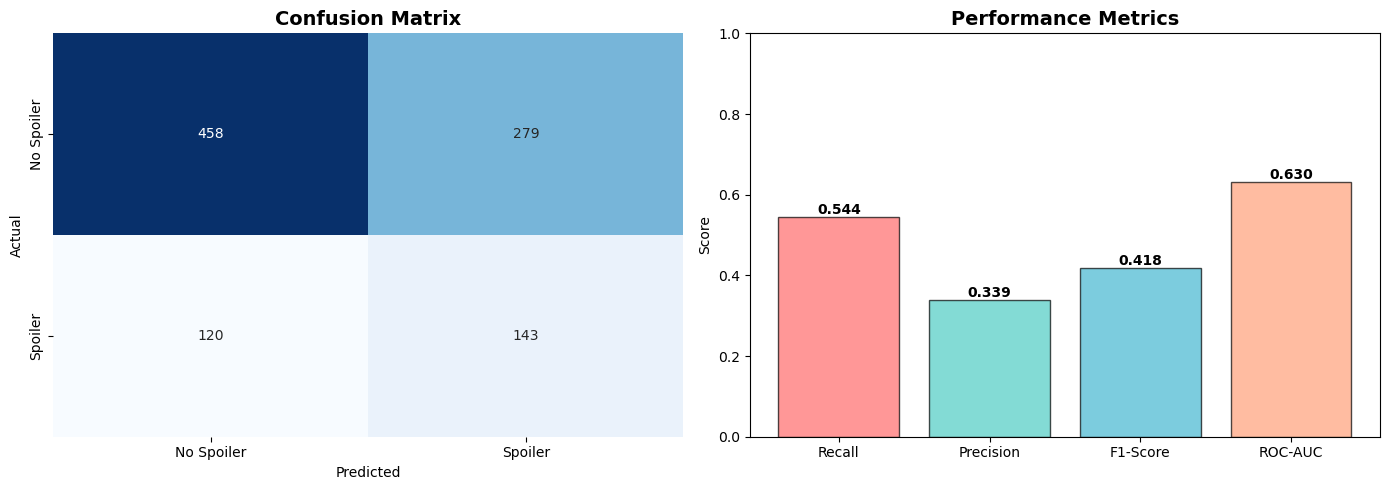

In [25]:
# ============================================================================
# STEP 6: Visualize results
# ============================================================================
print("\nStep 6: Creating visualizations...")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14, 5))

# Plot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5], ['No Spoiler', 'Spoiler'])
plt.yticks([0.5, 1.5], ['No Spoiler', 'Spoiler'])

# Plot 2: Metrics Comparison
plt.subplot(1, 2, 2)
metrics = ['Recall', 'Precision', 'F1-Score', 'ROC-AUC']
values = [recall, precision, f1, roc_auc]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

bars = plt.bar(metrics, values, color=colors, alpha=0.7, edgecolor='black')
plt.ylim(0, 1)
plt.title('Performance Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Score')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:.3f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
